In [30]:
!pip install kafka-python
!pip install tweepy

from kafka import KafkaConsumer
from kafka import KafkaClient

import numpy as np
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

import json

In [31]:
# Make the graphs prettier
pd.set_option('display.mpl_style', 'default')

In [42]:
def run():
        results = []
        consumer = KafkaConsumer(bootstrap_servers='localhost:9092',
                                 auto_offset_reset='earliest',
                                 consumer_timeout_ms=1000)
        consumer.subscribe(['testtopic'])

        for message in consumer:
            if(len(message.value)>50):
                j = json.loads(message.value)
                results.append(j)
        print("Number of tweets collected: "+str(len(results)))
        consumer.close()
        return results

In [46]:
results = []
results = run()
print(results[0])

Number of tweets collected: 2271
{u'user': {u'screen_name': u'MRfanFball', u'id': u'343417277', u'profile_image_url': u'http://pbs.twimg.com/profile_images/1463752904/Football-01-june_normal.gif', u'name': u'Fball.info'}, u'text': u"That's What They Said: Redskins' head coach Jay Gruden, quarterback Kirk Cousins https://t.co/Mkrn34lV60 || #NFL", u'created_at': u'Wed Dec 20 14:30:34 PST 2017', u'location': {u'lat': u'0', u'lon': u'0'}, u'id': u'943609599994843136'}


In [83]:
def extract_hash_tags(s):
    relevantHashtags = ['#NFL', '#NHL', '#MLB', '#NBA'] 
    allHashtags = set(part[0:] for part in s.split() if part.startswith('#'))
    ans = list(set(allHashtags) & set(relevantHashtags))
    ans.sort()
    return ' '.join(ans)

In [84]:
# Create a function to convert a given list of tweets into a Pandas DataFrame.
# The DataFrame will consist of only the values, which I think might be useful for analysis...


def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet["id"] for tweet in tweets]
    DataSet['tweetText'] = [tweet["text"] for tweet in tweets]
    DataSet['hashtags'] = [ extract_hash_tags(tweet["text"]) for tweet in tweets]
    DataSet['tweetCreated'] = [tweet["created_at"] for tweet in tweets]
    
    DataSet['userLocationLat'] = [tweet["location"]["lat"] for tweet in tweets]
    DataSet['userLocationLon'] = [tweet["location"]["lon"] for tweet in tweets]
    
    DataSet['userID'] = [tweet["user"]["id"] for tweet in tweets]
    DataSet['userScreen'] = [tweet["user"]["screen_name"] for tweet in tweets]
    DataSet['userName'] = [tweet["user"]["name"] for tweet in tweets]
    #DataSet['userTimezone'] = [tweet["user"]["time_zone"] for tweet in tweets]

    return DataSet

In [85]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [86]:
DataSet.head(6)

,tweetID,tweetText,hashtags,tweetCreated,userLocationLat,userLocationLon,userID,userScreen,userName
0,943609599994843136,That's What They Said: Redskins' head coach Ja...,#NFL,Wed Dec 20 14:30:34 PST 2017,0,0,343417277,MRfanFball,Fball.info
1,943609605908783104,#NBA Harden lleva a HoustonRockets a su triunf...,#NBA,Wed Dec 20 14:30:36 PST 2017,0,0,798682232,Kiemiguel,Kieffer Pire
2,943609602016468998,Up/Down: Gabriel Carlsson (D) | Cleveland Mons...,#NHL,Wed Dec 20 14:30:35 PST 2017,0,0,1456309854,ep_transfers,EP Transfers
3,943609608584744961,#MLB Giants announce they've interviewed ex-Pa...,#MLB,Wed Dec 20 14:30:36 PST 2017,0,0,340853126,xtnetworks,Xtreme Sports News
4,943609605069987840,#NBA Suns planning to keep Isaiah Canaan for y...,#NBA,Wed Dec 20 14:30:35 PST 2017,0,0,718398979982114816,Hydro_Sports,Hydro Sports
5,943609604017197056,#NBA spurs superó a LAClippers en el debut de ...,#NBA,Wed Dec 20 14:30:35 PST 2017,0,0,798682232,Kiemiguel,Kieffer Pire


In [87]:
DataSet.shape

(2271, 9)

In [90]:
# 'None' is treated as null here, so I'll remove all the records having 'None' in their 'hashtags' column
DataSet = DataSet[DataSet.hashtags.notnull()]
# Let's also check how many records are we left with now
len(DataSet)

2271

In [102]:
hashtagCount = DataSet['hashtags'].value_counts()[:6]
print hashtagCount

                       1004
#NBA                    516
#NFL                    392
#MLB                    224
#NHL                    100
#MLB #NBA #NFL #NHL      15
Name: hashtags, dtype: int64


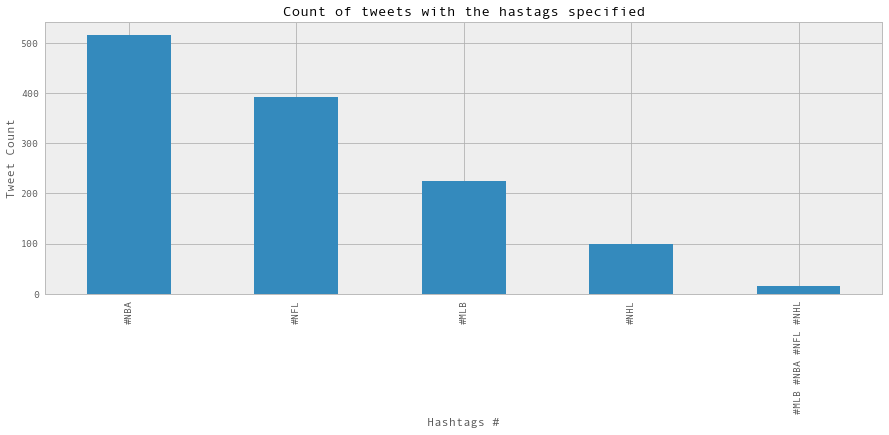

In [99]:
# Create a bar-graph figure of the specified size
plt.rcParams['figure.figsize'] = (15, 5)

# Plot the Time Zone data as a bar-graph
hashtagCount[1:].plot(kind='bar')


# Assign labels and title to the graph to make it more presentable
plt.xlabel('Hashtags #')
plt.ylabel('Tweet Count')
plt.title('Count of tweets with the hastags specified')